<a href="https://colab.research.google.com/github/geetanjalisawant16/covid-19_survey_csv/blob/main/Covid_19_Practical_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Working with Covid-19 Survey Datasets**
 >**MSc. DATA SCIENCE**

>**Module: Applied Data Programming**

>**Student ID: K1144343**

>**Covid-19 Pandemic UK Government Survey - Data Analysis Coding**
#####################################################################################
> This Jupyter Notebook consists of the assignment of 
"Covid-19 Practical Project" for the MSc. Data Science CI7340 Applied Data Programming Module at the Kingston University.
> The methods and steps of coding are reference from the case studies discussed during the lecture presented by the Module Leader. 
#####################################################################################

# Importing the dataset

##**Method 1**: From Github (official Pandas github link)


First, we will import the covid datasets directly from the official pandas github [link1](https://github.com/geetanjalisawant16/covid-19_survey_csv/blob/main/covid_flu_survey_features.csv)
[link2](https://github.com/geetanjalisawant16/covid-19_survey_csv/blob/main/covid_response_labels.csv)

In [434]:
# import all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode

Method 2 : Another way to upload the dataset from Github

In [435]:
!curl -O https://raw.githubusercontent.com/geetanjalisawant16/covid-19_survey_csv/main/covid_flu_survey_features.csv
!curl -O https://raw.githubusercontent.com/geetanjalisawant16/covid-19_survey_csv/main/covid_response_labels.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4146k  100 4146k    0     0  7868k      0 --:--:-- --:--:-- --:--:-- 7853k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  276k  100  276k    0     0  1095k      0 --:--:-- --:--:-- --:--:-- 1095k


## Reading the Dataset files:

In [436]:
survey = pd.read_csv('covid_flu_survey_features.csv')
response_labels = pd.read_csv('covid_response_labels.csv')

In [437]:
survey

,participant_id,covid_concern_level,covid_knowledge_level,has_taken_any_meds,precautions_avoidance,wears_face_mask,wash_hands_frequently,avoids_large_gatherings,reduced_outside_home_activity,avoid_touching_face,gp_rec_covid_vacc,gp_rec_seasonal_vacc,chronic_med_condition,child_under_6_months,is_healthworker,has_health_insurance,opinion_covid_vacc_effective,opinion_covid_risk,opinion_covid_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_flu_risk,opinion_seas_sick_from_vacc,age_group,education_level,race,gender,income_level,marital_status,own_or_rent,employment_status,location,location_type,no_household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,town,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,rural,0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,rural,2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,city,0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,rural,1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,town,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,city,1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,rural,0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,town,1.0,0.0,fcxhlnwr,haliazsg


In [438]:
response_labels

,participant_id,covid_vaccine,seasonal_flu_vaccine
0,0,1,0
1,1,1,1
2,2,1,0
3,3,1,1
4,4,1,0
...,...,...,...
26702,26702,1,0
26703,26703,1,0
26704,26704,1,1
26705,26705,1,0


##Merging the two datasets into one dataset:

In [439]:

covid=pd.merge(survey,response_labels)
covid

,participant_id,covid_concern_level,covid_knowledge_level,has_taken_any_meds,precautions_avoidance,wears_face_mask,wash_hands_frequently,avoids_large_gatherings,reduced_outside_home_activity,avoid_touching_face,gp_rec_covid_vacc,gp_rec_seasonal_vacc,chronic_med_condition,child_under_6_months,is_healthworker,has_health_insurance,opinion_covid_vacc_effective,opinion_covid_risk,opinion_covid_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_flu_risk,opinion_seas_sick_from_vacc,age_group,education_level,race,gender,income_level,marital_status,own_or_rent,employment_status,location,location_type,no_household_adults,household_children,employment_industry,employment_occupation,covid_vaccine,seasonal_flu_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,town,0.0,0.0,NaN,NaN,1,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,rural,0.0,0.0,pxcmvdjn,xgwztkwe,1,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,rural,2.0,0.0,rucpziij,xtkaffoo,1,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,city,0.0,0.0,NaN,NaN,1,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,rural,1.0,0.0,wxleyezf,emcorrxb,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,town,0.0,0.0,NaN,NaN,1,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,city,1.0,0.0,fcxhlnwr,cmhcxjea,1,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,rural,0.0,0.0,NaN,NaN,1,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,town,1.0,0.0,fcxhlnwr,haliazsg,1,0


# Initial Data Analysis:

> 1) Quality of data:

*    Frequency counts:
     The given dataset of covid-19 has got Structured and Unstructured data.
     It has got numeric(integer,float),Boolean(0,1) and strings i.e sequence
     of symbols kind of values in the data columns.
*    Discriptive/ Summary statistics.
      (mean,median,standard deviation, max,min,etc.)

*    Normality(frequency histograms)
  
> 2) Quality of Measurements,if applicable

> 3) Data Transformation: data transpose,data type change,sorting,deletion,etc.

  

## 1) Quality of data:

In [440]:
# a) checking the Datatypes frequency: 
covid.info() # Gives the information about Index, Datatype and Memory information.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   participant_id                 26707 non-null  int64  
 1   covid_concern_level            26615 non-null  float64
 2   covid_knowledge_level          26591 non-null  float64
 3   has_taken_any_meds             26636 non-null  float64
 4   precautions_avoidance          26499 non-null  float64
 5   wears_face_mask                26688 non-null  float64
 6   wash_hands_frequently          26665 non-null  float64
 7   avoids_large_gatherings        26620 non-null  float64
 8   reduced_outside_home_activity  26625 non-null  float64
 9   avoid_touching_face            26579 non-null  float64
 10  gp_rec_covid_vacc              24547 non-null  float64
 11  gp_rec_seasonal_vacc           24547 non-null  float64
 12  chronic_med_condition          25736 non-null 

In [441]:
covid.count() # returns the value of non-null values in each Dataframe(covid)

participant_id                   26707
covid_concern_level              26615
covid_knowledge_level            26591
has_taken_any_meds               26636
precautions_avoidance            26499
wears_face_mask                  26688
wash_hands_frequently            26665
avoids_large_gatherings          26620
reduced_outside_home_activity    26625
avoid_touching_face              26579
gp_rec_covid_vacc                24547
gp_rec_seasonal_vacc             24547
chronic_med_condition            25736
child_under_6_months             25887
is_healthworker                  25903
has_health_insurance             14433
opinion_covid_vacc_effective     26316
opinion_covid_risk               26319
opinion_covid_sick_from_vacc     26312
opinion_seas_vacc_effective      26245
opinion_seas_flu_risk            26193
opinion_seas_sick_from_vacc      26170
age_group                        26707
education_level                  25300
race                             26707
gender                   

In [442]:
# b) Descriptive/ Summary Statistics(mean,meadian,standard deviation,max,min,etc)
covid.describe(include='all') # gives Summary staistics for numerical columns

,participant_id,covid_concern_level,covid_knowledge_level,has_taken_any_meds,precautions_avoidance,wears_face_mask,wash_hands_frequently,avoids_large_gatherings,reduced_outside_home_activity,avoid_touching_face,gp_rec_covid_vacc,gp_rec_seasonal_vacc,chronic_med_condition,child_under_6_months,is_healthworker,has_health_insurance,opinion_covid_vacc_effective,opinion_covid_risk,opinion_covid_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_flu_risk,opinion_seas_sick_from_vacc,age_group,education_level,race,gender,income_level,marital_status,own_or_rent,employment_status,location,location_type,no_household_adults,household_children,employment_industry,employment_occupation,covid_vaccine,seasonal_flu_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,26458.000000,26458.000000,13377,13237,26707.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,4,2,3,2,2,3,10,3,NaN,NaN,21,23,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,rural,NaN,NaN,fcxhlnwr,xtkaffoo,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,NaN,NaN,2468,1778,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,NaN,NaN,0.787546,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,NaN,NaN,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,1.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,1.000000


Text(0.5, 1.0, 'Frequency Histogram')

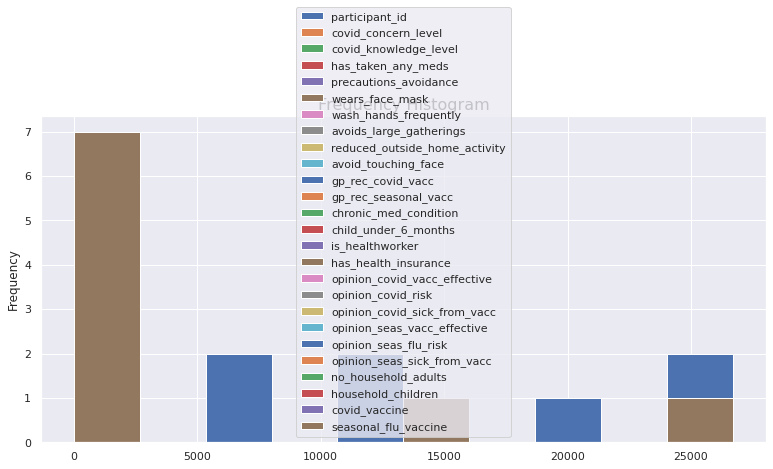

In [443]:
# c) Normality(frequency histograms)
covid.describe().plot.hist(bins=10,figsize=[13,6])
plt.title('Frequency Histogram',fontsize=16)


"""Therefore the output doesnot convey meaningful frequency normal distribution.
As this dataset does not have a completely numerical column values.
It has got categorical values also.Hence Frequency Histogram is not applicable for this Dataset"""

##2) Quality of measurements

In [444]:
# 2) Quality of measurements
covid.shape # Views the number of rows and columns of the dataset.

(26707, 38)

In [445]:
corrMatrix= covid.corr()
print(corrMatrix)

                               participant_id  ...  seasonal_flu_vaccine
participant_id                       1.000000  ...             -0.004652
covid_concern_level                  0.017839  ...              0.154828
covid_knowledge_level                0.003425  ...              0.120152
has_taken_any_meds                  -0.008475  ...              0.006277
precautions_avoidance                0.009638  ...              0.076395
wears_face_mask                     -0.006644  ...              0.050083
wash_hands_frequently                0.011105  ...              0.112414
avoids_large_gatherings              0.004539  ...              0.064025
reduced_outside_home_activity        0.009011  ...              0.053509
avoid_touching_face                  0.007575  ...              0.120228
gp_rec_covid_vacc                   -0.002072  ...              0.198607
gp_rec_seasonal_vacc                 0.001500  ...              0.369190
chronic_med_condition                0.005797  ... 

                               participant_id  ...  seasonal_flu_vaccine
participant_id                       1.000000  ...             -0.004652
covid_concern_level                  0.017839  ...              0.154828
covid_knowledge_level                0.003425  ...              0.120152
has_taken_any_meds                  -0.008475  ...              0.006277
precautions_avoidance                0.009638  ...              0.076395
wears_face_mask                     -0.006644  ...              0.050083
wash_hands_frequently                0.011105  ...              0.112414
avoids_large_gatherings              0.004539  ...              0.064025
reduced_outside_home_activity        0.009011  ...              0.053509
avoid_touching_face                  0.007575  ...              0.120228
gp_rec_covid_vacc                   -0.002072  ...              0.198607
gp_rec_seasonal_vacc                 0.001500  ...              0.369190
chronic_med_condition                0.005797  ... 

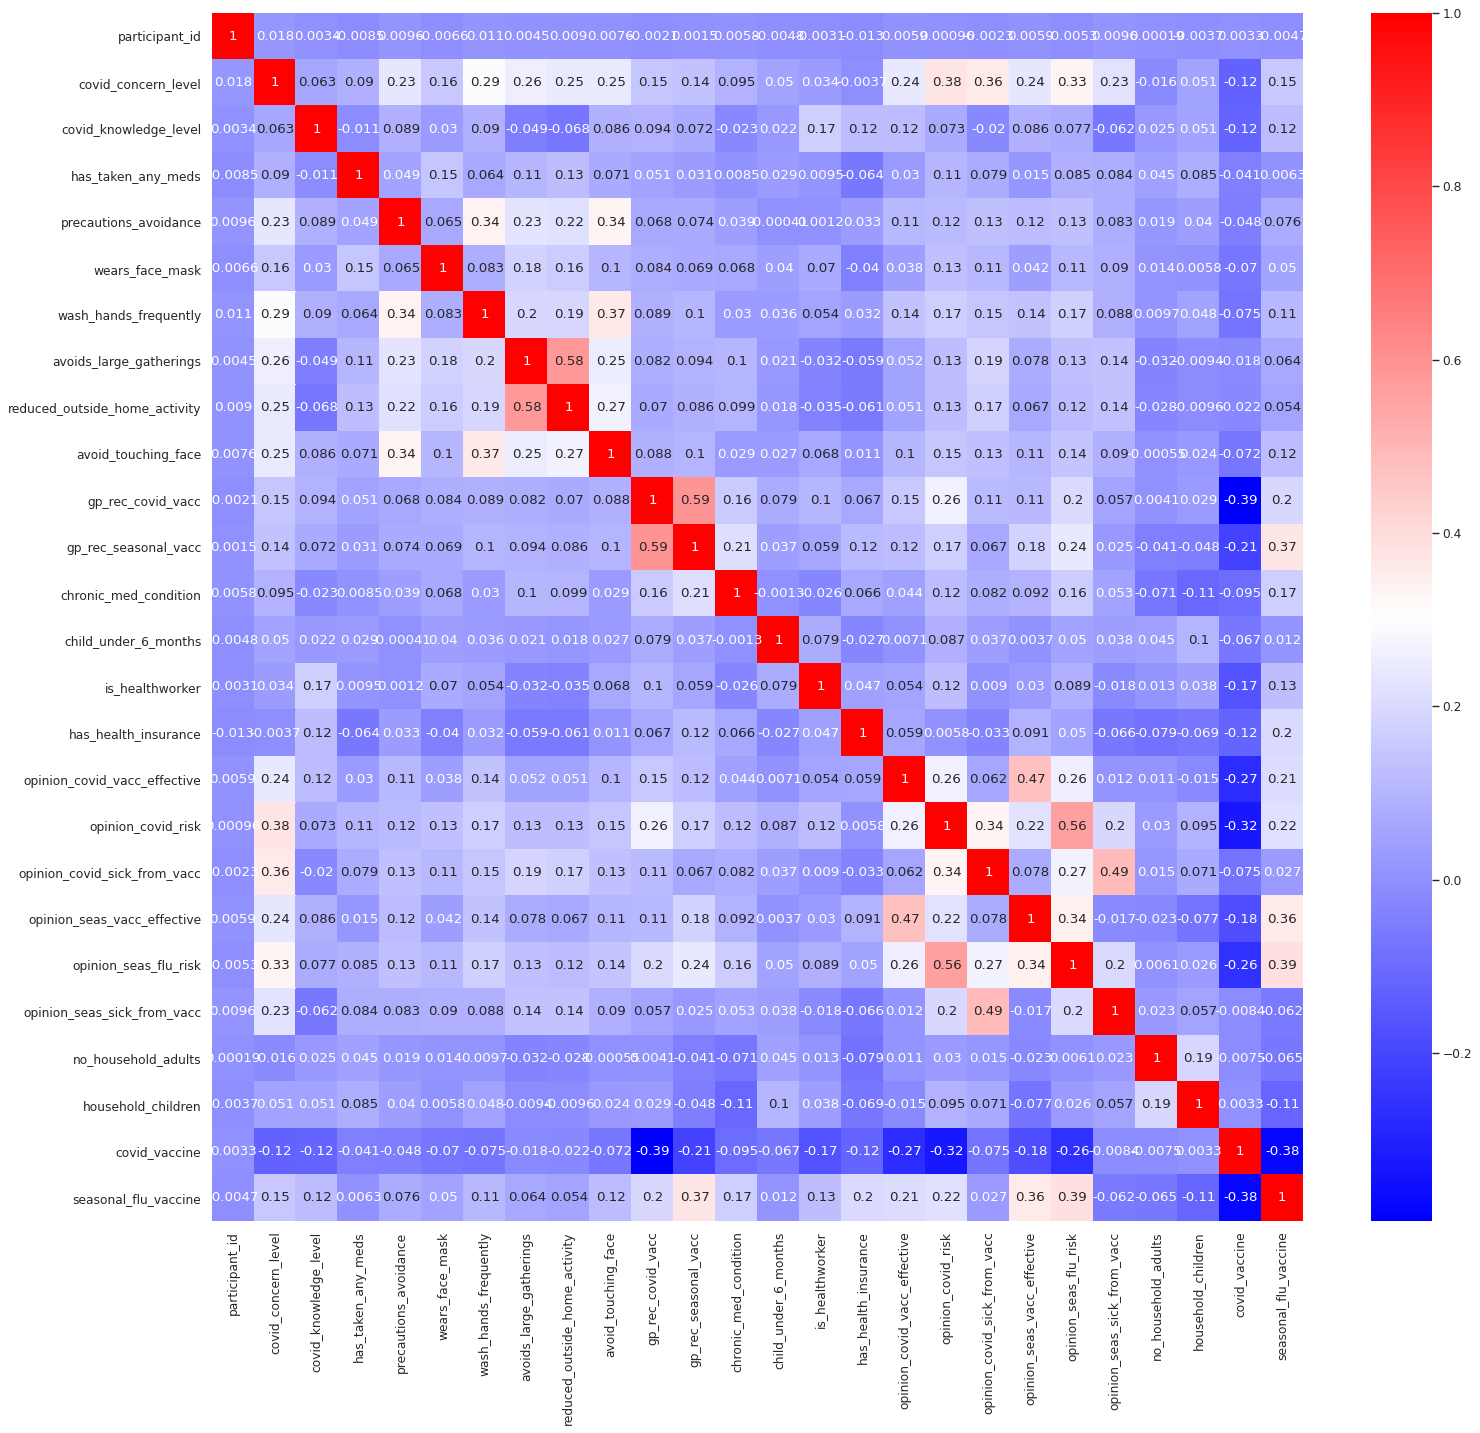

In [446]:
corrMatrix= covid.corr()
plt.figure(figsize=(22, 20), dpi= 80, facecolor='w', edgecolor='k')
sns.heatmap(corrMatrix,annot= True,cmap='bwr')
print(corrMatrix)

## 3)Data Transformation:
""" Data merging(features and labels) has to be done very first because there were two different csv files. The above data merging was done by 'Concatenation' method using 'outer' join to take all the data from both csv files and making one altogether 'covid' DataFrame."""

In [447]:
# Transposing the Dataset: Transposing means swapping the rows and columns of the dataset.
# When the output doesnot look right or funny Transpose the dataset is used.
covid.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,26667,26668,26669,26670,26671,26672,26673,26674,26675,26676,26677,26678,26679,26680,26681,26682,26683,26684,26685,26686,26687,26688,26689,26690,26691,26692,26693,26694,26695,26696,26697,26698,26699,26700,26701,26702,26703,26704,26705,26706
participant_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,26667,26668,26669,26670,26671,26672,26673,26674,26675,26676,26677,26678,26679,26680,26681,26682,26683,26684,26685,26686,26687,26688,26689,26690,26691,26692,26693,26694,26695,26696,26697,26698,26699,26700,26701,26702,26703,26704,26705,26706
covid_concern_level,1,3,1,1,2,3,0,1,0,2,2,1,1,1,3,1,2,1,1,2,3,2,1,3,0,1,3,3,0,2,3,2,2,2,1,2,2,1,1,2,...,0,2,3,2,1,2,2,1,2,0,3,0,3,1,2,2,1,3,2,0,3,2,2,0,2,1,1,2,0,2,1,2,2,3,2,2,1,2,1,0
covid_knowledge_level,0,2,1,1,1,1,0,0,2,1,1,2,1,1,1,1,1,1,2,2,1,2,1,0,1,2,1,2,1,1,2,1,2,1,1,1,2,1,1,1,...,2,1,2,2,1,1,2,1,2,1,1,2,1,1,1,2,2,1,0,2,2,2,1,2,2,1,1,2,0,1,1,1,2,1,2,0,2,2,1,0
has_taken_any_meds,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
precautions_avoidance,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,1,1,0,1,0,0,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,0,1,1,1,NaN,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,1
wears_face_mask,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
wash_hands_frequently,0,1,0,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,...,0,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0,0
avoids_large_gatherings,0,0,0,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,...,1,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
reduced_outside_home_activity,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0
avoid_touching_face,1,1,0,0,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,0,0,1,1,0,1,1,...,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,NaN,0


In [448]:
covid.columns

Index(['participant_id', 'covid_concern_level', 'covid_knowledge_level',
       'has_taken_any_meds', 'precautions_avoidance', 'wears_face_mask',
       'wash_hands_frequently', 'avoids_large_gatherings',
       'reduced_outside_home_activity', 'avoid_touching_face',
       'gp_rec_covid_vacc', 'gp_rec_seasonal_vacc', 'chronic_med_condition',
       'child_under_6_months', 'is_healthworker', 'has_health_insurance',
       'opinion_covid_vacc_effective', 'opinion_covid_risk',
       'opinion_covid_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_flu_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education_level', 'race', 'gender', 'income_level', 'marital_status',
       'own_or_rent', 'employment_status', 'location', 'location_type',
       'no_household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'covid_vaccine', 'seasonal_flu_vaccine'],
      dtype='object')

# Understanding the Datasets:

**NOTE**: For all binary variables: **0** =**NO**; **1** = **YES**
* **participant_id**: ID of the participant

* **covid_concern_level**: level of concern about Covid-19
0 = Not at all concerned; 1= Not very concerned; 2= Somewhat concerned; 3= Very concerned.

* **covid_knowledge_level**: level of knowledge about covid-19
 0= No knowledge;1= A little Knowledge; 2= A lot of Knowledge

* **has_taken_any_meds**: has taken any related medications(common cold, animalarial drugs,etc.)

* **precautions_avoidance**:takes precautions to avoid contact with other non-related people.

* **wears_face_mask**: wears face mask when going out.

* **wash_hands_frequently**: follows government guidelines and wash hands frequently.

* **avoids_large_gatherings**:avoids or tries to avoid large gatherings places such as restuarants,supermarkets during peak times and any form of contact with people outside of the household.

* **reduced_outside_home_activity**:Reduced unneccessary travel and trips outside of home other than the most required ones.

* **avoid_touching_face**:follows government guidelines and make sure to minimize touching of face.

* **gp_rec_covid_vacc**: the GP has recommended taking covid vaccination, when available.

* **gp_rec_seasonal_vacc**:The GP has recommended taking seasonal flu vaccine.

* **chronic_med_condition**: has a underlying health conditions like(asthma,diabetis) or a weak immune system which makes participants highly vulnerable.


* **child_under_6_months**: Participants has a regular contact with a child under six months(nursery duty, nanny, doctor)

* **is_healthworker**: is a healthworker (docter,nurse,etc)

* **has_health_insurance**: is covered by medical insurance(public or private)

* **opinion_covid_vacc_effective**:participants opinion about covid-19 vaccine effectiveness. 1= Not at all effective; 2= Not very effective; 3= Don't Know;4= Somewhat effective; 5= Very effective.


* **opinion_covid_risk**: Participant's opinion about risk of getting sick with covid flu without a vaccine.1=Very high; 2= Somewhat High; 3= Don't know; 
4= Somewhat low; 5= Very low


* **opinion_covid_sick_from_vacc**:participant's worry of getting sick from taking Covid Vaccine. 1= Very worried; 2= Somwhat worried; 3= Don't know; 4= Not very worried; 5= Not at all worried.

* **opinion_seas_vacc_effective**:participants opinion about seasonal flu vaccine effectiveness. 1= Not at all effective; 2= Not very effective; 3= Don't Know;4= Somewhat effective; 5= Very effective.

* **opinion_seas_flu_risk**: participants opinion about risk of getting sick with seasonal flu without a vaccine.

* **opinion_seas_sick_from_vacc**: participants worry about getting sick from taking the seasonal flu vaccine.1=not at all worried;2=not very worried;3=don't know
* **age_group**:age_group of the participants.


* **education_level**: education level of the participant(self-reported)


* **race**:participants race

* **gender**:participants gender

* **income_level**: income level of the participants.

* **marital_status**: marital status of the participants.

* **own_or_rent**: accommodation status of the participants. 

* **employment_status**: employment status of the participants.

* **location**:location of the participants.

* **location_type**:type of location(rural,town,city).

* **no_household_adults**:number of household adults excluding participants.

* **household_children**:number of children in the household.4 or more capped at 3.

* **employment_industry**:Participants type of employment industry.

* **employment_occupation**:Participants type of job
* **covid_vaccine**:participants respnse about covid-19 vaccine.

* **seasonal_flu_vaccine**: Participants response about seasonal flu vaccine.




















In [449]:
covid.head(8) # Printing out the top 8 values of the dataset

,participant_id,covid_concern_level,covid_knowledge_level,has_taken_any_meds,precautions_avoidance,wears_face_mask,wash_hands_frequently,avoids_large_gatherings,reduced_outside_home_activity,avoid_touching_face,gp_rec_covid_vacc,gp_rec_seasonal_vacc,chronic_med_condition,child_under_6_months,is_healthworker,has_health_insurance,opinion_covid_vacc_effective,opinion_covid_risk,opinion_covid_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_flu_risk,opinion_seas_sick_from_vacc,age_group,education_level,race,gender,income_level,marital_status,own_or_rent,employment_status,location,location_type,no_household_adults,household_children,employment_industry,employment_occupation,covid_vaccine,seasonal_flu_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,town,0.0,0.0,NaN,NaN,1,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,rural,0.0,0.0,pxcmvdjn,xgwztkwe,1,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,rural,2.0,0.0,rucpziij,xtkaffoo,1,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,city,0.0,0.0,NaN,NaN,1,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,rural,1.0,0.0,wxleyezf,emcorrxb,1,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,5.0,2.0,1.0,5.0,4.0,4.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,city,2.0,3.0,saaquncn,vlluhbov,1,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,rural,0.0,0.0,xicduogh,xtkaffoo,1,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,town,2.0,0.0,pxcmvdjn,xqwwgdyp,0,1


In [450]:
covid.tail(8) # Printing bottom 8 values of the dataset

,participant_id,covid_concern_level,covid_knowledge_level,has_taken_any_meds,precautions_avoidance,wears_face_mask,wash_hands_frequently,avoids_large_gatherings,reduced_outside_home_activity,avoid_touching_face,gp_rec_covid_vacc,gp_rec_seasonal_vacc,chronic_med_condition,child_under_6_months,is_healthworker,has_health_insurance,opinion_covid_vacc_effective,opinion_covid_risk,opinion_covid_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_flu_risk,opinion_seas_sick_from_vacc,age_group,education_level,race,gender,income_level,marital_status,own_or_rent,employment_status,location,location_type,no_household_adults,household_children,employment_industry,employment_occupation,covid_vaccine,seasonal_flu_vaccine
26699,26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,5.0,5.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,rural,1.0,0.0,pxcmvdjn,xgwztkwe,1,0
26700,26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,4.0,2.0,5.0,5.0,4.0,5.0,55 - 64 Years,12 Years,White,Female,"> $75,000",Married,Own,Not in Labor Force,lzgpxyit,city,1.0,0.0,NaN,NaN,1,1
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,2.0,4.0,4.0,2.0,4.0,18 - 34 Years,College Graduate,White,Female,"> $75,000",Not Married,Rent,Not in Labor Force,fpwskwrf,city,3.0,0.0,NaN,NaN,1,0
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,town,0.0,0.0,NaN,NaN,1,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,city,1.0,0.0,fcxhlnwr,cmhcxjea,1,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,rural,0.0,0.0,NaN,NaN,1,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,town,1.0,0.0,fcxhlnwr,haliazsg,1,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,65+ Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,city,1.0,0.0,NaN,NaN,1,0


In [451]:
covid.index 
# indexing gives the start , stop and step values in the dataset columns.

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            26697, 26698, 26699, 26700, 26701, 26702, 26703, 26704, 26705,
            26706],
           dtype='int64', length=26707)

In [452]:
covid.isnull() # Checks for the null values, Returns Boolean Array.

,participant_id,covid_concern_level,covid_knowledge_level,has_taken_any_meds,precautions_avoidance,wears_face_mask,wash_hands_frequently,avoids_large_gatherings,reduced_outside_home_activity,avoid_touching_face,gp_rec_covid_vacc,gp_rec_seasonal_vacc,chronic_med_condition,child_under_6_months,is_healthworker,has_health_insurance,opinion_covid_vacc_effective,opinion_covid_risk,opinion_covid_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_flu_risk,opinion_seas_sick_from_vacc,age_group,education_level,race,gender,income_level,marital_status,own_or_rent,employment_status,location,location_type,no_household_adults,household_children,employment_industry,employment_occupation,covid_vaccine,seasonal_flu_vaccine
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
26703,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26704,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,True,False,False
26705,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [453]:
# finding out the duplicates in the dataset
covid[covid.duplicated()]
# Hence there are no duplicates found in the Dataset.

,participant_id,covid_concern_level,covid_knowledge_level,has_taken_any_meds,precautions_avoidance,wears_face_mask,wash_hands_frequently,avoids_large_gatherings,reduced_outside_home_activity,avoid_touching_face,gp_rec_covid_vacc,gp_rec_seasonal_vacc,chronic_med_condition,child_under_6_months,is_healthworker,has_health_insurance,opinion_covid_vacc_effective,opinion_covid_risk,opinion_covid_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_flu_risk,opinion_seas_sick_from_vacc,age_group,education_level,race,gender,income_level,marital_status,own_or_rent,employment_status,location,location_type,no_household_adults,household_children,employment_industry,employment_occupation,covid_vaccine,seasonal_flu_vaccine


In [454]:
covid.isnull().sum()
# Checking the sum of all null values in the dataset.


participant_id                       0
covid_concern_level                 92
covid_knowledge_level              116
has_taken_any_meds                  71
precautions_avoidance              208
wears_face_mask                     19
wash_hands_frequently               42
avoids_large_gatherings             87
reduced_outside_home_activity       82
avoid_touching_face                128
gp_rec_covid_vacc                 2160
gp_rec_seasonal_vacc              2160
chronic_med_condition              971
child_under_6_months               820
is_healthworker                    804
has_health_insurance             12274
opinion_covid_vacc_effective       391
opinion_covid_risk                 388
opinion_covid_sick_from_vacc       395
opinion_seas_vacc_effective        462
opinion_seas_flu_risk              514
opinion_seas_sick_from_vacc        537
age_group                            0
education_level                   1407
race                                 0
gender                   

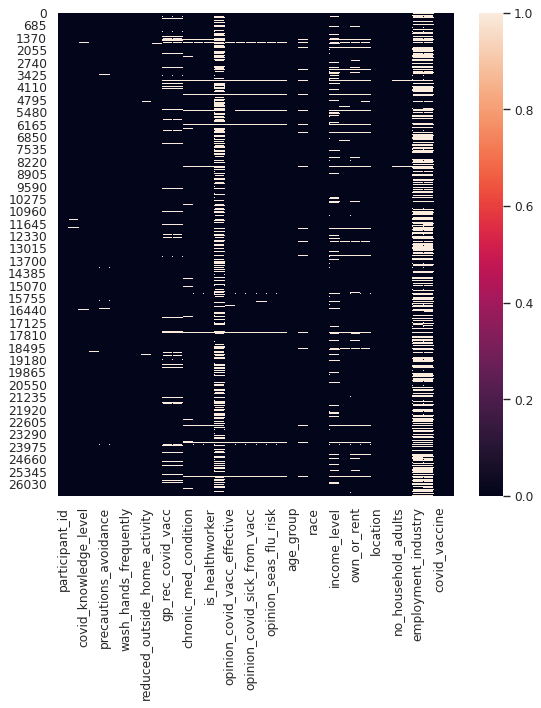

In [455]:
# Another way to see the null values in the dataset.
plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
sns.heatmap(covid.isnull()) 
# we can show missing values graphically presented
# black color shows the null values, beige color shows the positive values.

""" The heat map above shows two opposite dark results one is positive and other is negative. The result is about checking sum of null values is black is 0 means non-null values per columns and biege color is null values(nan)."""

# Key Questions that UK Official may want to focus on:


---
1. Comparison between participants’ “covid_knowledge_level” against“covid_concern_level”?
2.	Who is more concerned about Covid: Males or females? 
3.	Which age group is most and least concerned about Covid?
4.  How many participants said they wear mask?
5.	How does different races compare with regards to attitude towards avoiding large gatherings?
6.	How does Education level compare with Covid knowledge?
7.	Which group has significantly reduced their outside home activity?
8.	How are people concerned about Covid Vaccine among different education levels?
9.	Are people with Chronic Medical conditions more concerned about Covid?
10.	Are GPs likely to recommend Covid Vaccine to people with Chronic Medical Conditions? 
   

---





# Exploratory Data Analysis:
Lets solve common issues with the dataset like:
*   Data cleaning
*   filling missing values
*   noise in the dataset
*   checking errors

##Data Cleaning:
""" The covid dataset got most of the columns with  null  and non null values, but here I will use the columns for which I have framed the 10 keys questions.
Rest of the columns will have to be dropped to save the memory space."""

In [456]:
covid

,participant_id,covid_concern_level,covid_knowledge_level,has_taken_any_meds,precautions_avoidance,wears_face_mask,wash_hands_frequently,avoids_large_gatherings,reduced_outside_home_activity,avoid_touching_face,gp_rec_covid_vacc,gp_rec_seasonal_vacc,chronic_med_condition,child_under_6_months,is_healthworker,has_health_insurance,opinion_covid_vacc_effective,opinion_covid_risk,opinion_covid_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_flu_risk,opinion_seas_sick_from_vacc,age_group,education_level,race,gender,income_level,marital_status,own_or_rent,employment_status,location,location_type,no_household_adults,household_children,employment_industry,employment_occupation,covid_vaccine,seasonal_flu_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,town,0.0,0.0,NaN,NaN,1,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,rural,0.0,0.0,pxcmvdjn,xgwztkwe,1,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,rural,2.0,0.0,rucpziij,xtkaffoo,1,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,city,0.0,0.0,NaN,NaN,1,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,rural,1.0,0.0,wxleyezf,emcorrxb,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,town,0.0,0.0,NaN,NaN,1,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,city,1.0,0.0,fcxhlnwr,cmhcxjea,1,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,rural,0.0,0.0,NaN,NaN,1,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,town,1.0,0.0,fcxhlnwr,haliazsg,1,0


In [457]:
# lets take out the median of the Covid dataset:
covid.median() # Returns the median of numeric(integer,float) datatype columns only.

participant_id                   13353.0
covid_concern_level                  2.0
covid_knowledge_level                1.0
has_taken_any_meds                   0.0
precautions_avoidance                1.0
wears_face_mask                      0.0
wash_hands_frequently                1.0
avoids_large_gatherings              0.0
reduced_outside_home_activity        0.0
avoid_touching_face                  1.0
gp_rec_covid_vacc                    0.0
gp_rec_seasonal_vacc                 0.0
chronic_med_condition                0.0
child_under_6_months                 0.0
is_healthworker                      0.0
has_health_insurance                 1.0
opinion_covid_vacc_effective         4.0
opinion_covid_risk                   2.0
opinion_covid_sick_from_vacc         2.0
opinion_seas_vacc_effective          4.0
opinion_seas_flu_risk                2.0
opinion_seas_sick_from_vacc          2.0
no_household_adults                  1.0
household_children                   0.0
covid_vaccine   

In [458]:
# using fillna() function to fill all NAN values in the above columns by their respective median value:
covid.fillna(covid.median(),inplace=True) 
# Now the columns with numeric datatype has filled with non-null values.
covid.isnull().sum()

participant_id                       0
covid_concern_level                  0
covid_knowledge_level                0
has_taken_any_meds                   0
precautions_avoidance                0
wears_face_mask                      0
wash_hands_frequently                0
avoids_large_gatherings              0
reduced_outside_home_activity        0
avoid_touching_face                  0
gp_rec_covid_vacc                    0
gp_rec_seasonal_vacc                 0
chronic_med_condition                0
child_under_6_months                 0
is_healthworker                      0
has_health_insurance                 0
opinion_covid_vacc_effective         0
opinion_covid_risk                   0
opinion_covid_sick_from_vacc         0
opinion_seas_vacc_effective          0
opinion_seas_flu_risk                0
opinion_seas_sick_from_vacc          0
age_group                            0
education_level                   1407
race                                 0
gender                   

"""Replacing the categorical and string values in the columns by using mode function.
Mode is the value that appears most of the time in a set of data values.Here mode function will replace 
NaN value by most occuring values in the respective columns."""

In [497]:
# Repalcing the categorical and string values in the columns by using mode function.
# Impute the values
covid['education_level'].fillna(mode(covid['education_level']).mode[0], inplace=True)
covid['income_level'].fillna(mode(covid['income_level']).mode[0],inplace=True)
covid['marital_status'].fillna(mode(covid['marital_status']).mode[0],inplace=True)
covid['child_under_6_months'].fillna(mode(covid['child_under_6_months']).mode[0],inplace=True)
covid['own_or_rent'].fillna(mode(covid['own_or_rent']).mode[0],inplace=True)
covid['employment_status'].fillna(mode(covid['employment_status']).mode[0],inplace=True)
covid['employment_industry'].fillna(mode(covid['employment_industry']).mode[0],inplace=True)
covid['employment_occupation'].fillna(mode(covid['employment_occupation']).mode[0],inplace=True)

In [498]:
#Now checking the non-null values of the required columns:
covid.isnull().sum()

participant_id                   0
covid_concern_level              0
covid_knowledge_level            0
precautions_avoidance            0
wears_face_mask                  0
wash_hands_frequently            0
avoids_large_gatherings          0
reduced_outside_home_activity    0
avoid_touching_face              0
gp_rec_covid_vacc                0
gp_rec_seasonal_vacc             0
chronic_med_condition            0
child_under_6_months             0
is_healthworker                  0
opinion_covid_vacc_effective     0
age_group                        0
education_level                  0
race                             0
gender                           0
income_level                     0
marital_status                   0
own_or_rent                      0
employment_status                0
location                         0
location_type                    0
employment_industry              0
employment_occupation            0
covid_vaccine                    0
seasonal_flu_vaccine

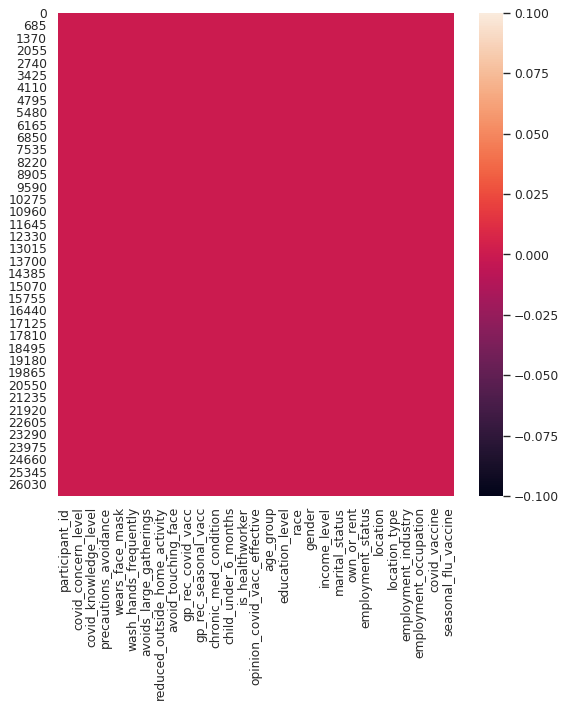

In [499]:
# Another way to see the null values in the dataset.
plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
sns.heatmap(covid.isnull()) 
# we can show missing values graphically presented.
# black color shows the null values, pink color shows the non-null values.

""" therefore the heatmap o/p shows every column's NaN is pink('0') now means the null values are cleaned from the dataset. The dataset is ready to perform further computation."""

## Dropping columns 
""" Here I will drop the unwanted columns because they are not needed for my key questions, but they may be important for general analysis in future."""

In [465]:
# Dropping the columns which are not needed to solve the Key questions:
covid.drop(labels=["has_taken_any_meds"],axis=1,inplace=True)
covid.drop(labels=["no_household_adults"],axis=1,inplace=True)
covid.drop(labels=["household_children"],axis=1,inplace=True)
covid.drop(labels=["has_health_insurance"],axis=1,inplace=True)


In [466]:
# Dropping the columns which are not needed to solve the Key questions:
covid.drop(labels=["opinion_covid_risk"],axis=1,inplace=True)
covid.drop(labels=["opinion_seas_sick_from_vacc"],axis=1,inplace=True)
covid.drop(labels=["opinion_covid_sick_from_vacc"],axis=1,inplace=True)
covid.drop(labels=["opinion_seas_vacc_effective"],axis=1,inplace=True)
covid.drop(labels=["opinion_seas_flu_risk"],axis=1,inplace=True)


In [467]:
# lets check the Final required Covid Dataset to proceed with further Discriptive Data analysis.
covid.head(8)

,participant_id,covid_concern_level,covid_knowledge_level,precautions_avoidance,wears_face_mask,wash_hands_frequently,avoids_large_gatherings,reduced_outside_home_activity,avoid_touching_face,gp_rec_covid_vacc,gp_rec_seasonal_vacc,chronic_med_condition,child_under_6_months,is_healthworker,opinion_covid_vacc_effective,age_group,education_level,race,gender,income_level,marital_status,own_or_rent,employment_status,location,location_type,employment_industry,employment_occupation,covid_vaccine,seasonal_flu_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,town,fcxhlnwr,xtkaffoo,1,0
1,1,3.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,rural,pxcmvdjn,xgwztkwe,1,1
2,2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,rural,rucpziij,xtkaffoo,1,0
3,3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,city,fcxhlnwr,xtkaffoo,1,1
4,4,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,rural,wxleyezf,emcorrxb,1,0
5,5,3.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,city,saaquncn,vlluhbov,1,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,rural,xicduogh,xtkaffoo,1,0
7,7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,5.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,town,pxcmvdjn,xqwwgdyp,0,1


In [500]:
covid.isnull().sum() # checking the non-null values are left or not?

participant_id                   0
covid_concern_level              0
covid_knowledge_level            0
precautions_avoidance            0
wears_face_mask                  0
wash_hands_frequently            0
avoids_large_gatherings          0
reduced_outside_home_activity    0
avoid_touching_face              0
gp_rec_covid_vacc                0
gp_rec_seasonal_vacc             0
chronic_med_condition            0
child_under_6_months             0
is_healthworker                  0
opinion_covid_vacc_effective     0
age_group                        0
education_level                  0
race                             0
gender                           0
income_level                     0
marital_status                   0
own_or_rent                      0
employment_status                0
location                         0
location_type                    0
employment_industry              0
employment_occupation            0
covid_vaccine                    0
seasonal_flu_vaccine

In [469]:
# Now the replacing the non null values and dropping the not needed columns is done.Lets see at the shape of the dataset 
covid.shape # checking the modified rows and columns


(26707, 29)

# Correlation analysis

                               participant_id  ...  seasonal_flu_vaccine
participant_id                       1.000000  ...             -0.004652
covid_concern_level                  0.017896  ...              0.154488
covid_knowledge_level                0.003473  ...              0.119779
precautions_avoidance                0.008912  ...              0.076130
wears_face_mask                     -0.006654  ...              0.050020
wash_hands_frequently                0.011212  ...              0.112254
avoids_large_gatherings              0.004455  ...              0.063722
reduced_outside_home_activity        0.009181  ...              0.053287
avoid_touching_face                  0.007606  ...              0.119925
gp_rec_covid_vacc                   -0.002178  ...              0.198560
gp_rec_seasonal_vacc                 0.001131  ...              0.360696
chronic_med_condition                0.004753  ...              0.169465
child_under_6_months                -0.004993  ... 

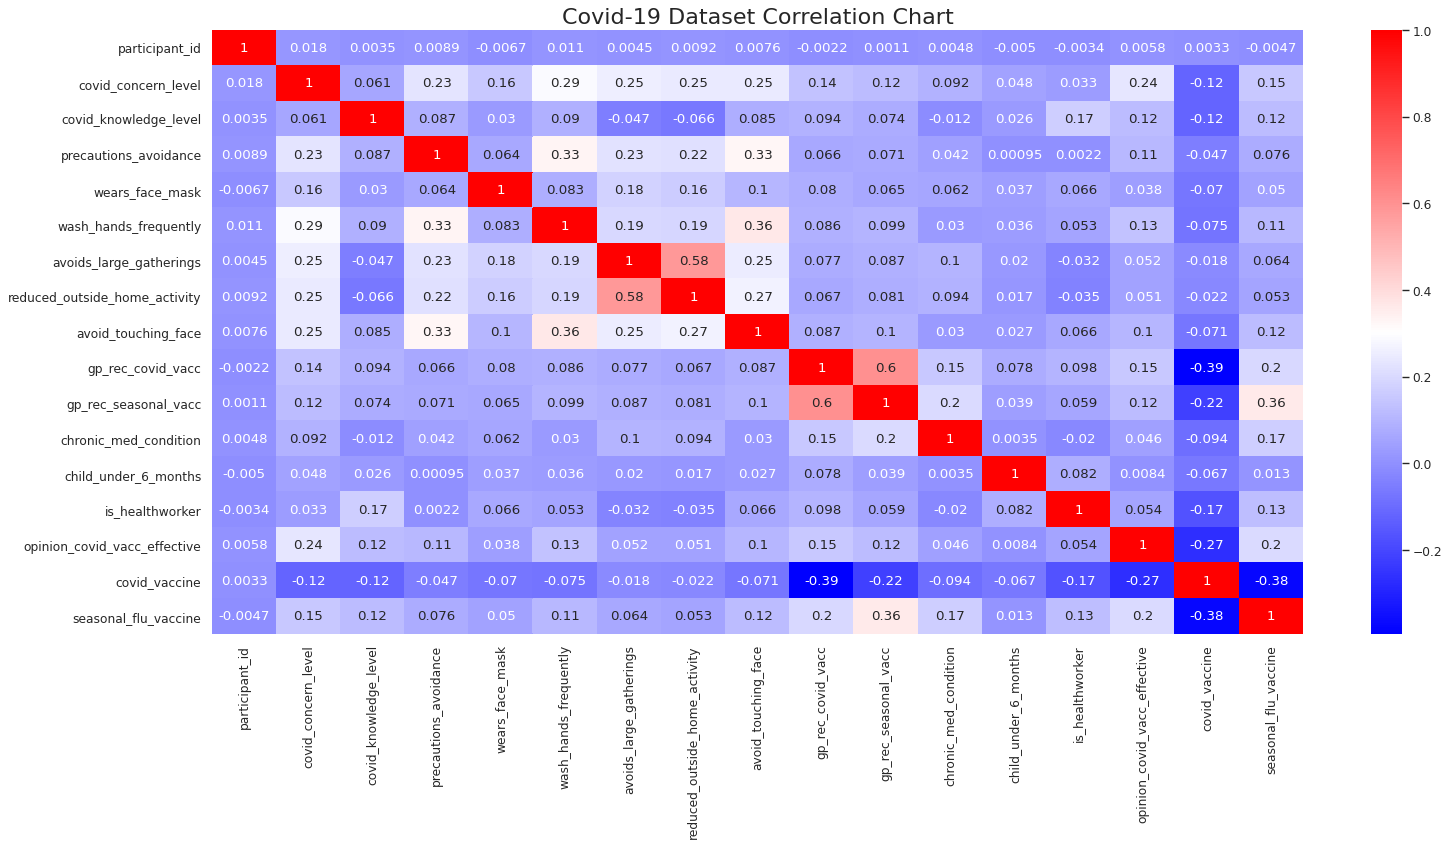

In [501]:
# Correlation analysis: Checking the corelation of the final required dataset.
corrCovid= covid.corr()
plt.figure(figsize=(22, 10), dpi= 80, facecolor='w', edgecolor='k')
sns.heatmap(corrCovid,annot= True,cmap='bwr') # use for visual representation of correlation of Covid dataset.
plt.title('Covid-19 Dataset Correlation Chart',fontsize=20) 
print(corrCovid)

""" The Correlation Chart for example Heat Map chart is very useful when there are multiple variables to compare in the data set. Darker the colour, larger is positive correlation magnitude vice-versa. The diagonal blocks from top left to bottom right are all “1” and same colour, which means they are perfectly correlated i.e corelation of variable with itself. In the chart above, the darker the “red” colour gets, larger is the positive correlation between the two compared variables. Darker the “blue” colour gets, larger is the negative correlation. The lighter the colour e.g whitish or off whitish gets, the correlation gets weaker which means there is very little corelation between the two compared variables. 
For examples, in the chart above heatmap, “reduced outside activity” has higher positive correlation with “avoids larger gatherings”. “GP recommended seasonal vaccine” has larger positive corelation with “GP recommended Covid vaccine”. """


# Using Numpy

In [471]:
# Using Numpy
covid.to_numpy()

array([[0, 1.0, 0.0, ..., 'xtkaffoo', 1, 0],
       [1, 3.0, 2.0, ..., 'xgwztkwe', 1, 1],
       [2, 1.0, 1.0, ..., 'xtkaffoo', 1, 0],
       ...,
       [26704, 2.0, 2.0, ..., 'xtkaffoo', 1, 1],
       [26705, 1.0, 1.0, ..., 'haliazsg', 1, 0],
       [26706, 0.0, 0.0, ..., 'xtkaffoo', 1, 0]], dtype=object)

""" Using numpy function to convert covid dataframe into Numpy Array."""

## Generating aggregating statistics:

In [472]:
covid.mean()

participant_id                   13353.000000
covid_concern_level                  1.619800
covid_knowledge_level                1.261392
precautions_avoidance                0.727749
wears_face_mask                      0.068933
wash_hands_frequently                0.825888
avoids_large_gatherings              0.357472
reduced_outside_home_activity        0.336279
avoid_touching_face                  0.678811
gp_rec_covid_vacc                    0.202494
gp_rec_seasonal_vacc                 0.303067
chronic_med_condition                0.272962
child_under_6_months                 0.080054
is_healthworker                      0.108548
opinion_covid_vacc_effective         3.852810
covid_vaccine                        0.787546
seasonal_flu_vaccine                 0.465608
dtype: float64

In [473]:
covid.median()

participant_id                   13353.0
covid_concern_level                  2.0
covid_knowledge_level                1.0
precautions_avoidance                1.0
wears_face_mask                      0.0
wash_hands_frequently                1.0
avoids_large_gatherings              0.0
reduced_outside_home_activity        0.0
avoid_touching_face                  1.0
gp_rec_covid_vacc                    0.0
gp_rec_seasonal_vacc                 0.0
chronic_med_condition                0.0
child_under_6_months                 0.0
is_healthworker                      0.0
opinion_covid_vacc_effective         4.0
covid_vaccine                        1.0
seasonal_flu_vaccine                 0.0
dtype: float64

In [474]:
covid.describe() # giving the values for integers and floats values only

,participant_id,covid_concern_level,covid_knowledge_level,precautions_avoidance,wears_face_mask,wash_hands_frequently,avoids_large_gatherings,reduced_outside_home_activity,avoid_touching_face,gp_rec_covid_vacc,gp_rec_seasonal_vacc,chronic_med_condition,child_under_6_months,is_healthworker,opinion_covid_vacc_effective,covid_vaccine,seasonal_flu_vaccine
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.619800,1.261392,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,0.202494,0.303067,0.272962,0.080054,0.108548,3.852810,0.787546,0.465608
std,7709.791156,0.909016,0.617047,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,0.401866,0.459592,0.445490,0.271382,0.311077,1.000195,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000
50%,13353.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000


In [475]:
covid.describe(include='all') # now by adding 'all' it describes values for objects also.

,participant_id,covid_concern_level,covid_knowledge_level,precautions_avoidance,wears_face_mask,wash_hands_frequently,avoids_large_gatherings,reduced_outside_home_activity,avoid_touching_face,gp_rec_covid_vacc,gp_rec_seasonal_vacc,chronic_med_condition,child_under_6_months,is_healthworker,opinion_covid_vacc_effective,age_group,education_level,race,gender,income_level,marital_status,own_or_rent,employment_status,location,location_type,employment_industry,employment_occupation,covid_vaccine,seasonal_flu_vaccine
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707,26707,26707,26707,26707,26707,26707,26707,26707,26707,26707,26707,26707.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,4,2,3,2,2,3,10,3,21,23,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,rural,fcxhlnwr,xtkaffoo,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6843,11504,21222,15858,17200,14963,20778,15023,4297,11645,15798,15248,NaN,NaN
mean,13353.000000,1.619800,1.261392,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,0.202494,0.303067,0.272962,0.080054,0.108548,3.852810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.787546,0.465608
std,7709.791156,0.909016,0.617047,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,0.401866,0.459592,0.445490,0.271382,0.311077,1.000195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
50%,13353.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000


In [476]:
covid[['covid_concern_level','covid_knowledge_level']].describe()
# getting statistical values for two selected columns

,covid_concern_level,covid_knowledge_level
count,26707.000000,26707.000000
mean,1.619800,1.261392
std,0.909016,0.617047
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,3.000000,2.000000


In [477]:
# range of covid_concern_level and covid_knowlegde_level
covid['covid_concern_level'].max()-covid['covid_knowledge_level'].min()

3.0

In [478]:
# Calculating combinations of aggregating statistics ton analyse descriptive statistics between the columns.
# using DataFrame.agg() method:
covid.agg({'covid_concern_level':['min','max','median','mean'],
          'covid_knowledge_level':['min','max','median','mean']})

,covid_concern_level,covid_knowledge_level
min,0.0000,0.000000
max,3.0000,2.000000
median,2.0000,1.000000
mean,1.6198,1.261392


# Aggregating Statistics grouped by category

In [479]:
# What is the average of wears face mask for male versus average wears_face_mask of female participants?
covid.groupby(by="gender").mean()["wears_face_mask"]

gender
Female    0.079392
Male      0.053645
Name: wears_face_mask, dtype: float64

In [285]:
#Key Q.1.Comparison between participants’ “covid_knowledge_level” against “covid_concern_level”?
covid.groupby(by="covid_knowledge_level").mean()["covid_concern_level"]

covid_knowledge_level
0.0    1.468077
1.0    1.609556
2.0    1.675767
Name: covid_concern_level, dtype: float64

In [480]:
# Using 'groupby' to get mean of each columns for gender group.
covid.groupby('gender').mean()
# This gives us comparison between females and males survey for covid-19.

,participant_id,covid_concern_level,covid_knowledge_level,precautions_avoidance,wears_face_mask,wash_hands_frequently,avoids_large_gatherings,reduced_outside_home_activity,avoid_touching_face,gp_rec_covid_vacc,gp_rec_seasonal_vacc,chronic_med_condition,child_under_6_months,is_healthworker,opinion_covid_vacc_effective,covid_vaccine,seasonal_flu_vaccine
gender,,,,,,,,,,,,,,,,,
Female,13320.038593,1.715664,1.295876,0.769202,0.079392,0.875142,0.379619,0.351558,0.741645,0.216232,0.329424,0.291273,0.087842,0.136398,3.866692,0.780552,0.497415
Male,13401.179740,1.479676,1.210987,0.667158,0.053645,0.753894,0.325099,0.313946,0.586967,0.182413,0.264541,0.246198,0.068670,0.067840,3.832519,0.797769,0.419117


In [481]:
# Key Q.2.Who is more concerned about Covid: Males or females? 
covid.groupby("gender")["covid_concern_level"].mean()


gender
Female    1.715664
Male      1.479676
Name: covid_concern_level, dtype: float64

"""This shows the females are more concerned compared to males about covid-19.
But there is a fact that while the survey was taken the females participants were found to be more as male participants.
this gives answer to our Key Question 2."""

In [482]:
# Lets do 'gender' value_counts to do correct analysis.
covid['gender'].value_counts()


Female    15858
Male      10849
Name: gender, dtype: int64

"""Here it shows the females participants value_counts are more compared to male participants value_counts.
There could be a case that males go to work outside tso when the survey was taken the females were in the house looking
after their kids so female participants concern could be more."""

In [483]:
# 3.Which age group is most and least concerned about Covid?
covid.groupby(["age_group"])["covid_concern_level"].mean()


age_group
18 - 34 Years    1.455417
35 - 44 Years    1.668139
45 - 54 Years    1.665139
55 - 64 Years    1.665289
65+ Years        1.646208
Name: covid_concern_level, dtype: float64

""" ANS: So output shows the age_group between 65+ years are more concerned about covid-19.
18-34 years age_group are very less concerned about covid."""

In [484]:
covid['age_group'].value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

""" the count of 65+ are more also while surveying,but still the fact is count of 18-34 participants is more then also their concern level was found to be low."""

In [485]:
# Key Question 4.How many participants said they wear face mask? 
covid['wears_face_mask'].value_counts()


0.0    24866
1.0     1841
Name: wears_face_mask, dtype: int64

"""Therefore only 1841 out of 27000 participants answered yes they wear face mask and 24866 participants answered no means do not wear face mask.""

In [486]:
# Q.5.How does different races compare with regards to attitude towards avoiding large gatherings?
covid.groupby(["race"])["avoids_large_gatherings"].mean()
#ANS:The output shows that the hispanic and black race participantsfollows the advice to avoid large gatherings quite most.
# Othe or multiple race participants follow medium range of advice to avoid large gatherings.
# But the important fact is white race participants are least bothered to follow the advice of avoiding Large gatherings.

race
Black                0.470727
Hispanic             0.476353
Other or Multiple    0.446650
White                0.329564
Name: avoids_large_gatherings, dtype: float64

In [487]:
#Q.6.	How does Education level compare with Covid knowledge?
covid.groupby(["education_level"])["covid_knowledge_level"].mean()
# ANS:The output shows that among the education level from 12 years to College graduates Some college participants
#are having most knowlegde about Covid-19.
# The fact shows the participants who are less than 12 years of education level are having least knowlegde about Covid-19.
# This group consists of small kids who goes to nursery, primary school going children, Secondary or Highschool going children.

education_level
12 Years            1.101949
< 12 Years          0.845535
College Graduate    1.413943
Some College        1.282976
Name: covid_knowledge_level, dtype: float64

In [490]:
#Q.7.Which group has significantly reduced their outside home activity?

covid.groupby('age_group')["reduced_outside_home_activity"].mean()

age_group
18 - 34 Years    0.283030
35 - 44 Years    0.310551
45 - 54 Years    0.314624
55 - 64 Years    0.335790
65+ Years        0.408300
Name: reduced_outside_home_activity, dtype: float64

"""As you can see from o/p, majority people from all age groups have not reduced outside home activities."""

In [243]:
#Q.8.How are people concerned about Covid Vaccine among different education levels?
covid.groupby(["education_level","covid_vaccine"])["covid_concern_level"].mean()



education_level   covid_vaccine
12 Years          0                1.939309
                  1                1.613415
< 12 Years        0                1.979747
                  1                1.742378
College Graduate  0                1.771137
                  1                1.520776
Some College      0                1.829918
                  1                1.521061
Name: covid_concern_level, dtype: float64

"""So the output shows overall particpant's covid-19 concern level is somewhat  more than covid_vaccine. This could be beacuse the covid-19 vaccine is still not arrived so the education_level participants responded 'NO' comparitively towards covid-19 vaccine more than they answered 'YES'."""

In [244]:
#Q.9.Are people with Chronic Medical conditions more concerned about Covid?
covid.groupby(["chronic_med_condition"])["covid_concern_level"].mean()


chronic_med_condition
0.0    1.568419
1.0    1.756653
Name: covid_concern_level, dtype: float64

"""The output shows that participants with Chronic medical condition are more concerned about the covid-19 as compared with the participants not having chronic_med_condition.Also the output shows the people who have not got chronic med condition has low ratio of participants.

In [495]:
# lets check the counts of participants about chronic_med_condition who said yes(1).
covid["chronic_med_condition"].value_counts()


0.0    19417
1.0     7290
Name: chronic_med_condition, dtype: int64

""The o/p shows the participant's count is very low who are having chronic med condition. It is good to see participants with less chronic med condition."

In [296]:
#Q.10.	Are GPs likely to recommend Covid Vaccine to people with Chronic Medical Conditions? 
covid.groupby(["chronic_med_condition"])["gp_rec_covid_vacc"].mean()


chronic_med_condition
0.0    0.165062
1.0    0.302195
Name: gp_rec_covid_vacc, dtype: float64

"""Its good to see the output that gp has recommended covid vaccine first to the people with chronic medical condition.People with no chronic medical condition will be the second or last priority for the gp to recommend covid-19 vaccine."""

# Sorting

In [337]:
covid.sort_values("child_under_6_months",ascending=False).head(8)


,participant_id,covid_concern_level,covid_knowledge_level,precautions_avoidance,wears_face_mask,wash_hands_frequently,avoids_large_gatherings,reduced_outside_home_activity,avoid_touching_face,gp_rec_covid_vacc,gp_rec_seasonal_vacc,chronic_med_condition,child_under_6_months,is_healthworker,opinion_covid_vacc_effective,age_group,education_level,race,gender,income_level,marital_status,own_or_rent,employment_status,location,location_type,employment_industry,employment_occupation,covid_vaccine,seasonal_flu_vaccine
13924,13924,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,55 - 64 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,oxchjgsf,town,fcxhlnwr,xtkaffoo,0,1
16610,16610,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,18 - 34 Years,Some College,Black,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,qufhixun,rural,mcubkhph,oijqvulv,1,0
6271,6271,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,4.0,18 - 34 Years,Some College,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,oxchjgsf,city,fcxhlnwr,xtkaffoo,1,0
1784,1784,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,4.0,45 - 54 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,bhuqouqj,rural,atmlpfrs,mxkfnird,1,1
9666,9666,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lrircsnp,rural,fcxhlnwr,cmhcxjea,0,1
1786,1786,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,35 - 44 Years,Some College,White,Female,"> $75,000",Married,Own,Not in Labor Force,qufhixun,city,fcxhlnwr,xtkaffoo,1,1
20954,20954,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,35 - 44 Years,College Graduate,White,Male,"> $75,000",Married,Rent,Employed,bhuqouqj,city,cfqqtusy,xtkaffoo,1,0
20956,20956,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,fpwskwrf,town,fcxhlnwr,xtkaffoo,1,0


"""Shows the sorting is done by the column of 'child_under_6_months' taking the yes[1] values first.
yes[1] values means the participants works as nursery staff, childminder or nanny so has a regular contact with children under
6 months old."""

# Using Pivot,pivot table and Slicing:

In [518]:
#Use of pivot:
# Lets compare the other columns which are not in the Keys Questions.
covid.pivot(index='participant_id',columns='precautions_avoidance',values='wash_hands_frequently')

precautions_avoidance,0.0,1.0
participant_id,,
0,0.0,NaN
1,NaN,1.0
2,NaN,0.0
3,NaN,1.0
4,NaN,1.0
...,...,...
26702,NaN,0.0
26703,NaN,1.0
26704,NaN,1.0


""" the above pivot chart shows index as participant_id,columns as precautions_avoidance in '0' and '1'. values are wash_hands_frequently, so there are NAN values which are replacing empty spaces by answering both columns of '0' and '1'.

In [515]:
#Use of pivot_table:
covid.pivot_table(columns='child_under_6_months',values='covid_concern_level')
# here pivot_table gave a mean value of covid_concern_level for participants who work for child_under_6_months.

child_under_6_months,0.0,1.0
covid_concern_level,1.606822,1.768943


In [509]:
covid.loc[1:11] # loc gives the output of 1-11 rows.

,participant_id,covid_concern_level,covid_knowledge_level,precautions_avoidance,wears_face_mask,wash_hands_frequently,avoids_large_gatherings,reduced_outside_home_activity,avoid_touching_face,gp_rec_covid_vacc,gp_rec_seasonal_vacc,chronic_med_condition,child_under_6_months,is_healthworker,opinion_covid_vacc_effective,age_group,education_level,race,gender,income_level,marital_status,own_or_rent,employment_status,location,location_type,employment_industry,employment_occupation,covid_vaccine,seasonal_flu_vaccine
1,1,3.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,rural,pxcmvdjn,xgwztkwe,1,1
2,2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,rural,rucpziij,xtkaffoo,1,0
3,3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,city,fcxhlnwr,xtkaffoo,1,1
4,4,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,rural,wxleyezf,emcorrxb,1,0
5,5,3.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,city,saaquncn,vlluhbov,1,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,rural,xicduogh,xtkaffoo,1,0
7,7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,5.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,town,pxcmvdjn,xqwwgdyp,0,1
8,8,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,45 - 54 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,bhuqouqj,rural,xicduogh,ccgxvspp,1,0
9,9,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,55 - 64 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,rural,fcxhlnwr,xtkaffoo,1,0
10,10,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,45 - 54 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,lzgpxyit,rural,xicduogh,qxajmpny,0,1


In [349]:
# lets see the 'child_under_6_months' column compared with covid_concern_level?
covid.iloc[1:15,[1,12]] # iloc gave the o/p of 1-15 rows and 1st column and 12th column in the dataframe.

,covid_concern_level,child_under_6_months
1,3.0,0.0
2,1.0,0.0
3,1.0,0.0
4,2.0,0.0
5,3.0,0.0
6,0.0,0.0
7,1.0,0.0
8,0.0,0.0
9,2.0,0.0
10,2.0,1.0


In [352]:
covid.sort_values("child_under_6_months",ascending=False).iloc[1:15,[1,12]]


,covid_concern_level,child_under_6_months
16610,2.0,1.0
6271,2.0,1.0
1784,1.0,1.0
9666,2.0,1.0
1786,1.0,1.0
20954,1.0,1.0
20956,2.0,1.0
12416,3.0,1.0
15320,2.0,1.0
3513,1.0,1.0


""" This output shows the only participants covid concern level who works for child under 6 months.
its actually some what good and more concerned participants about Covid-19 who works for child under 6 months."""


In [355]:
covid.sort_values("child_under_6_months",ascending=False).iloc[1:15,[1,12]].mean()


covid_concern_level     1.714286
child_under_6_months    1.000000
dtype: float64

"""child under 6 months have low immunity level so its good to see participants who are in contact with these babies are more concerned towards coronavirus pandemic."""

# Using Stack and Unstacked.

In [356]:
#using stack()
covid.stack()

0      participant_id                  0
       covid_concern_level             1
       covid_knowledge_level           0
       precautions_avoidance           0
       wears_face_mask                 0
                                  ...   
26706  location_type                city
       employment_industry      fcxhlnwr
       employment_occupation    xtkaffoo
       covid_vaccine                   1
       seasonal_flu_vaccine            0
Length: 774503, dtype: object

""" The stack function is used to see the dataset(covid) in a datastructure to see data in the format of Last in First out (LIFO)manner or First in First out manner.It does Pivot the level of the column label."""

In [357]:
#using unstack()
covid.unstack(level=1)

participant_id        0        0
                      1        1
                      2        2
                      3        3
                      4        4
                              ..
seasonal_flu_vaccine  26702    0
                      26703    0
                      26704    1
                      26705    0
                      26706    0
Length: 774503, dtype: object

"""unstack does opposite process of stack function.It returns a DataFrame of having a new level of column labels whose inner most level consists of pivoted index labels."""

In [358]:
covid

,participant_id,covid_concern_level,covid_knowledge_level,precautions_avoidance,wears_face_mask,wash_hands_frequently,avoids_large_gatherings,reduced_outside_home_activity,avoid_touching_face,gp_rec_covid_vacc,gp_rec_seasonal_vacc,chronic_med_condition,child_under_6_months,is_healthworker,opinion_covid_vacc_effective,age_group,education_level,race,gender,income_level,marital_status,own_or_rent,employment_status,location,location_type,employment_industry,employment_occupation,covid_vaccine,seasonal_flu_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,town,fcxhlnwr,xtkaffoo,1,0
1,1,3.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,rural,pxcmvdjn,xgwztkwe,1,1
2,2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,rural,rucpziij,xtkaffoo,1,0
3,3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,city,fcxhlnwr,xtkaffoo,1,1
4,4,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,rural,wxleyezf,emcorrxb,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,town,fcxhlnwr,xtkaffoo,1,0
26703,26703,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,city,fcxhlnwr,cmhcxjea,1,0
26704,26704,2.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,rural,fcxhlnwr,xtkaffoo,1,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,town,fcxhlnwr,haliazsg,1,0


# Plotting using Matplotlib and Seaborn:

No handles with labels found to put in legend.


Text(0.5, 1.0, 'covid_knowledge_level V/S covid_concern_level')

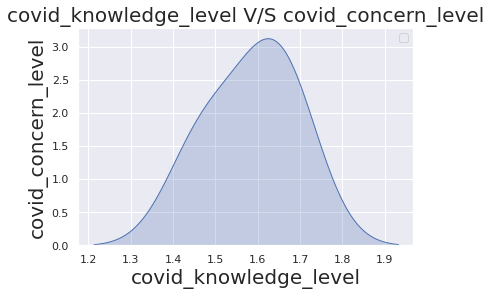

In [359]:
#Q.1.Comparison between participants’ “covid_knowledge_level” against “covid_concern_level”?
sns.kdeplot(covid.groupby(by="covid_knowledge_level").mean()["covid_concern_level"],shade=True)
plt.xlabel('covid_knowledge_level', fontsize=20)
plt.ylabel('covid_concern_level', fontsize=20)
plt.legend()
plt.title('covid_knowledge_level V/S covid_concern_level', fontsize=20)



"""ANS: So the visual output is done using seaborn kedlpot and matlab for labelling the plot.
The analysis shows that the average comparison done between covid_knowledge_level and covid_concern_level 
is 1.6 to 1.7 value. hence fact shows the surveyed participants are nearly to the range of somewhat concerned 
and a little knowlegde about covid-19."""

Text(0.5, 1.0, 'covid_concern_level More in Males or Females')

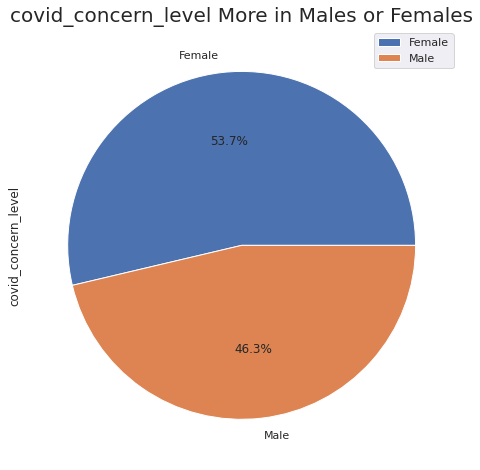

In [256]:
#Q.2.Who is more concerned about Covid: Males or females? 
covid.groupby(["gender"])["covid_concern_level"].mean().plot.pie(autopct='%1.1f%%',figsize=[8,8])
plt.legend()
plt.title('covid_concern_level More in Males or Females', fontsize=20)




"""ANS:This shows the females are more concerned compared to males about covid-19.
But there is a fact that while the survey was taken the females participants were found to be more as male participants."""

Text(0.5, 1.0, 'Value_counts between Male and Female')

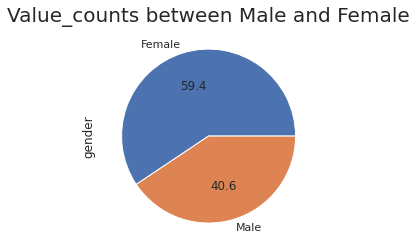

In [257]:
# Lets plot the value counts within the gender data set.
covid['gender'].value_counts().plot.pie(autopct="%1.1f")
plt.title('Value_counts between Male and Female', fontsize=20)


"""Here it shows the females participants percentage of value_counts are more compared to male participants percentage.
There could be a case that males go to work outside tso when the survey was taken the females were in the house looking
after their kids or older people in the house or pets so female participants concern could be more."""

Text(0.5, 1.0, 'Covid_concern_level within Different Age_group')

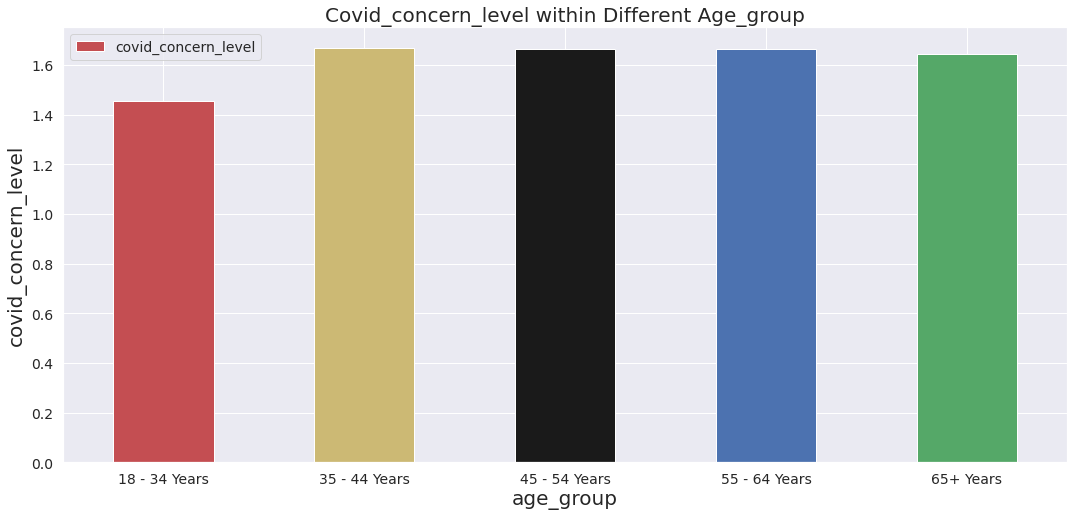

In [258]:
#Q.3.	Which age group is most and least concerned about Covid?
covid.groupby(["age_group"])["covid_concern_level"].mean().plot.bar(figsize=[18,8],
              fontsize=14,color=['r','y','k','b','g'],rot=0)
plt.xlabel('age_group', fontsize=20)
plt.ylabel('covid_concern_level', fontsize=20)
plt.legend(fontsize=14)
plt.title('Covid_concern_level within Different Age_group',fontsize=20)


"""ANS: So output shows the age_group between 65+ years are most concerned about covid-19.
18-34 years age_group are least concerned about covid-19."""

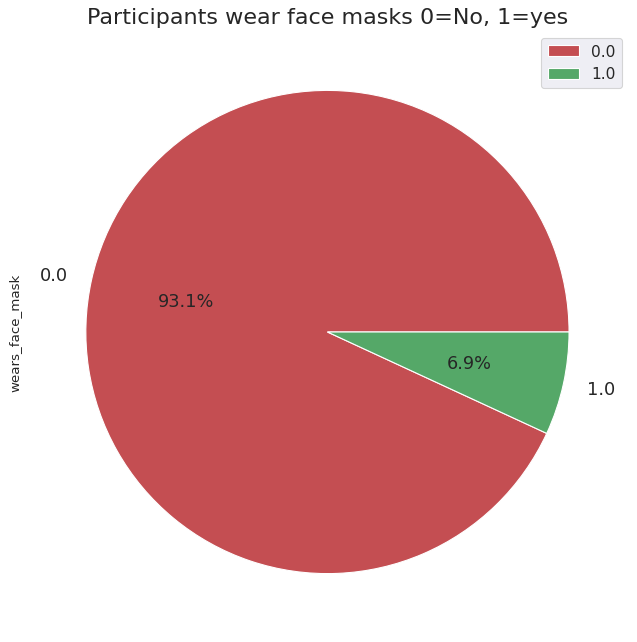

In [261]:
## Key Question 4.How many participants said they wear face mask? 
plt.figure(figsize=(18, 10), dpi= 80, facecolor='w',edgecolor='k')

covid['wears_face_mask'].value_counts().plot.pie(autopct="%1.1f%%",startangle=0,fontsize=16, colors=["r","g"])
plt.title('Participants wear face masks 0=No, 1=yes',fontsize=20)
plt.legend(fontsize=14)

"""Therefore only 6.9% answered yes they wear face mask and 93.1% participants answered no means do not wear face mask.""

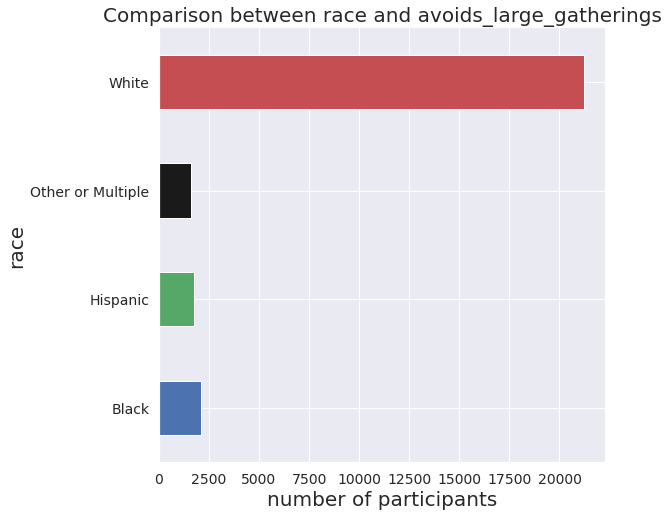

In [430]:
#Q.5.How does different races compare with regards to attitude towards avoiding large gatherings?
covid.groupby(["race"])["avoids_large_gatherings"].count().plot.barh(fontsize=14,color=['b','g','k','r'],
                                                                    figsize=[8,8],label='avoids_large_gatherings')

plt.xlabel('number of participants', fontsize=20)
plt.ylabel('race', fontsize=20)
plt.title('Comparison between race and avoids_large_gatherings',fontsize=20)
plt.grid(b='dark')
plt.show()


"""ANS:The output shows that the hispanic and black race participants follow the advice to avoid large gatherings quite most.
Othe or multiple race participants follow medium range of advice to avoid large gatherings.
But the important fact is white race participants are least bothered to follow the advice of avoiding Large gatherings."""

Text(0.5, 1.0, 'Education_level V/s Covid_Knowlege_level')

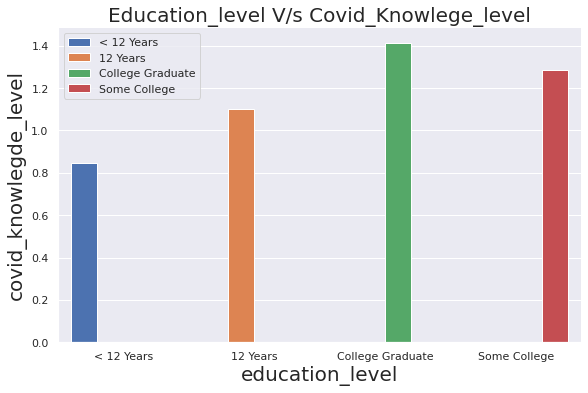

In [431]:
#Q.6.How does Education level compare with Covid knowledge?
# Using Seaborn to plot.
sns.set()
sns.set_theme(style='darkgrid')
ax=sns.catplot(x='education_level',y='covid_knowledge_level',
                data=covid, saturation=1.8,hue='education_level',
                kind="bar", ci=0, aspect=1.6,legend_out=True,
                legend=True)

ax.set_xlabels('education_level',fontsize=20)
ax.set_ylabels('covid_knowlegde_level',fontsize=20)
plt.legend()
plt.title('Education_level V/s Covid_Knowlege_level',fontsize=20)


"""ANS:The output shows that among the education level from 12 years to College graduates and some college participants
are having most knowlegde about Covid-19.
The fact shows the participants who are less than 12 years of education level are having least knowlegde about Covid-19.
It may be the case that while taking the covid-19 survey children less than 12 years were not asked because their age is less.
This group consists of small kids who goes to nursery, primary school going children, Secondary or Highschool going children."""

Text(0.5, 1.0, 'Age group vs outside home activity')

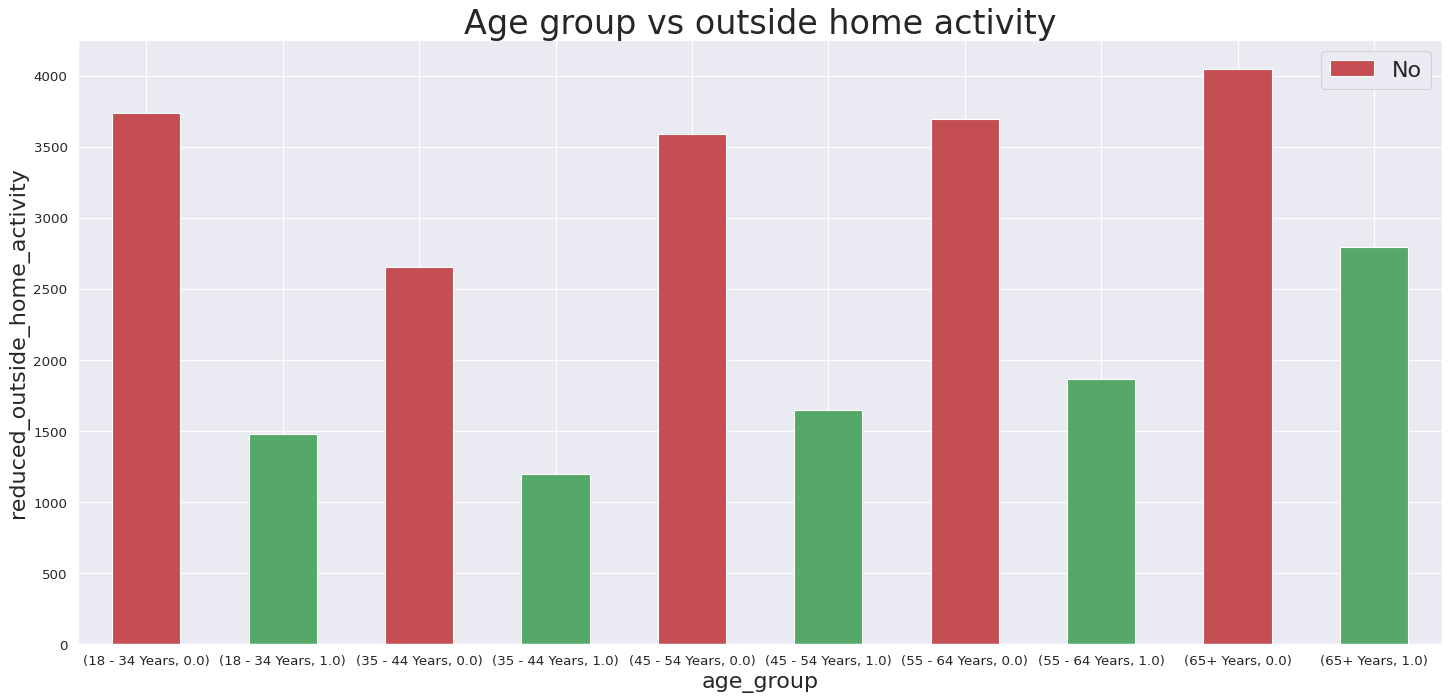

In [264]:
#Q.7.Which group has significantly reduced their outside home activity?
plt.figure(figsize=(22, 10), dpi= 80, facecolor='w', edgecolor='k')
covid.groupby('age_group')["reduced_outside_home_activity"].value_counts().plot.bar(rot=0,fontsize=12,color=['r','g'],label='No')
plt.xlabel('age_group',fontsize=20)
plt.ylabel('reduced_outside_home_activity',fontsize=20)
plt.legend(fontsize=20)
plt.title('Age group vs outside home activity',fontsize=30)

"""As you can see from the bar-chart above, majority people from all age groups have not reduced outside home activities."""

In [397]:
#Q.8.How are participant's concerned about Covid Vaccine among different education levels?
ax=covid.pivot_table(index='education_level',columns='covid_vaccine',values='covid_concern_level') # Using pivot table to cross check the visual o/p below.

covid_vaccine,0,1
education_level,,
12 Years,1.939309,1.613415
< 12 Years,1.979747,1.742378
College Graduate,1.771137,1.520776
Some College,1.829918,1.521061


Text(0.5, 1.0, 'Education_level covid_vaccine V/S covid_concern_level')

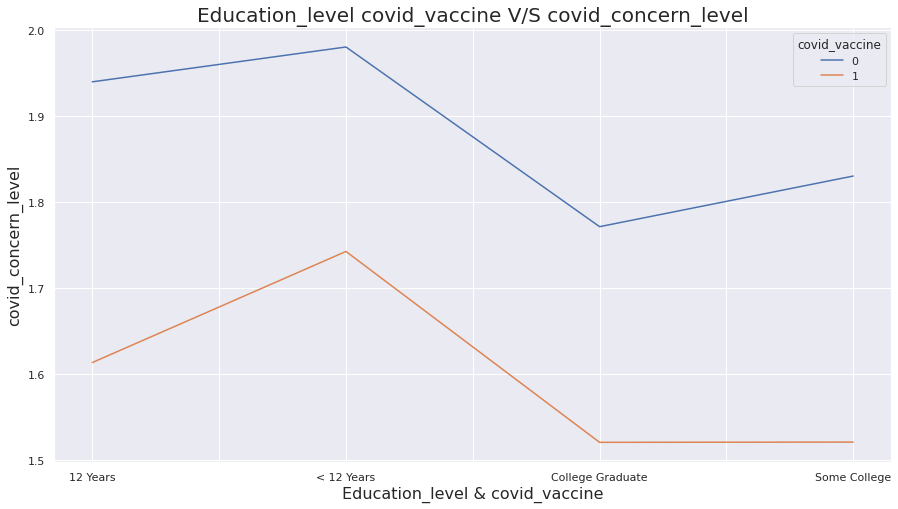

In [425]:
# Method:1 Using pivot_table to plot the o/p in line plot.
covid.pivot_table(index='education_level',columns='covid_vaccine',values='covid_concern_level').plot.line(figsize=(15, 8))
plt.xlabel('Education_level & covid_vaccine',fontsize=16)
plt.ylabel('covid_concern_level',fontsize=16)
plt.title('Education_level covid_vaccine V/S covid_concern_level',fontsize=20)


Text(0.5, 1.0, 'Education_level covid_vaccine V/S covid_concern_level')

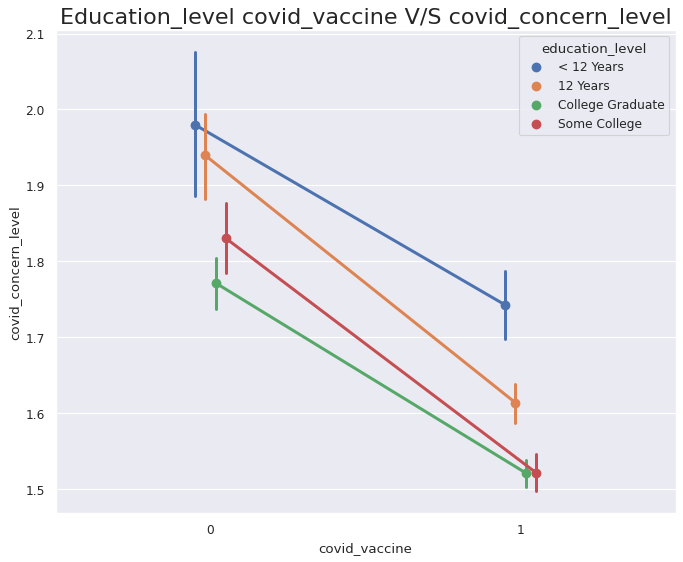

In [421]:
# method:2 using seaborn plot to get the o/p.
plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
sns.pointplot(x='covid_vaccine',y='covid_concern_level',hue='education_level',data=covid,dodge=True)
plt.title('Education_level covid_vaccine V/S covid_concern_level',fontsize=20)


"""So the output shows overall particpant's covid-19 concern level is somewhat  more than covid_vaccine. This could be beacuse the covid-19 vaccine is still not arrived so the education_level participants responded 'NO' comparitively towards covid-19 vaccine more than they answered 'YES'."""

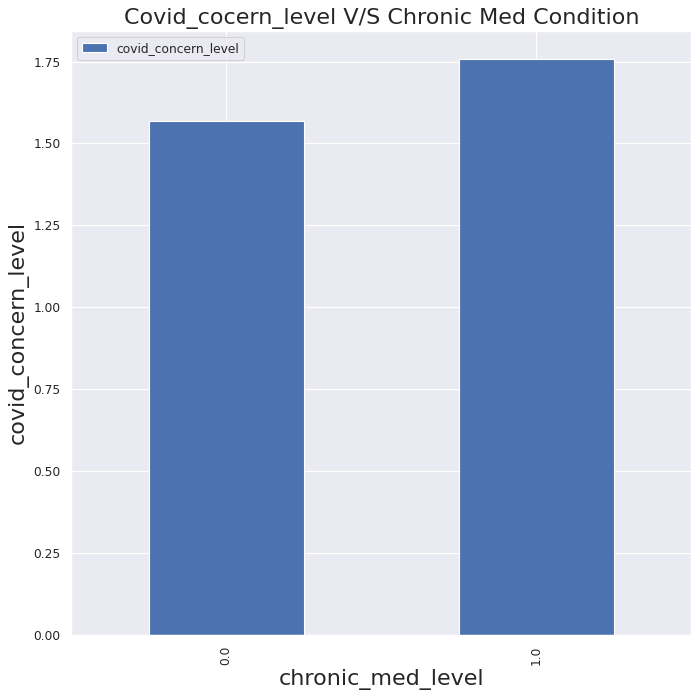

In [268]:
#Q.9.Are people with Chronic Medical conditions more concerned about Covid?
plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
covid.groupby(["chronic_med_condition"])["covid_concern_level"].mean().plot.bar()
plt.title('Covid_cocern_level V/S Chronic Med Condition',fontsize=20)
plt.xlabel('chronic_med_level',fontsize=20)
plt.ylabel('covid_concern_level',fontsize=20)
plt.legend()



"""The output shows that participants with Chronic medical condition are more concerned about the covid-19 as compared with the participants not having chronic_med_condition.Also the output shows the people who haven't got chronic med condition has low ratio of participants."""

Text(0.5, 1.0, 'GPs Recommedation of Covid_vacc how likely to Chronic_med_condition')

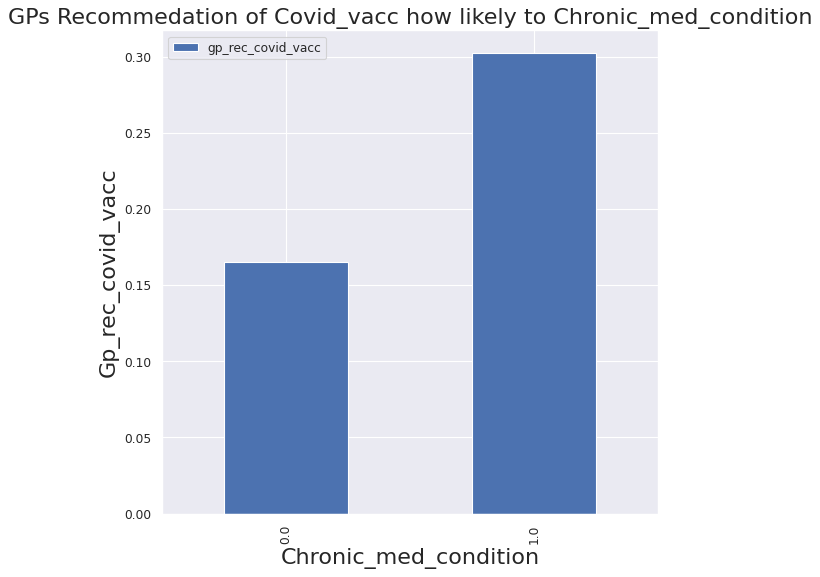

In [271]:
#Q.10.	Are GPs likely to recommend Covid Vaccine to people with Chronic Medical Conditions? 
plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
covid.groupby(["chronic_med_condition"])["gp_rec_covid_vacc"].mean().plot.bar()
plt.legend()
plt.xlabel('Chronic_med_condition',fontsize=20)
plt.ylabel('Gp_rec_covid_vacc',fontsize=20)
plt.title('GPs Recommedation of Covid_vacc how likely to Chronic_med_condition',fontsize=20)


"""Its good to see the output that gp has recommended covid vaccine first to the people with chronic medical condition.
People with no chronic medical condition will be the second or last priority for the gp to recommend covid-19 vaccine."""